In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
train = pd.read_csv('training_set.csv')
train_meta = pd.read_csv('training_set_metadata.csv')
train = train.merge(train_meta[['object_id', 'ddf', 'ra', 'decl', 'target']], 
                    how='left', on='object_id')

object_id 105869076


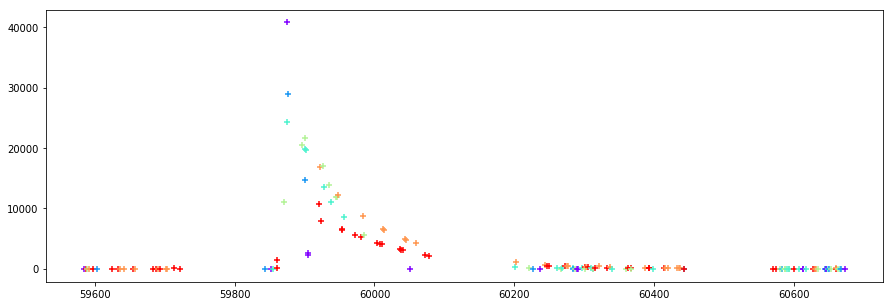

In [5]:
object_id = 105869076
print('object_id', object_id)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
df = train[train.object_id == object_id]
ax.scatter(df.mjd, df.flux, c=df.passband, cmap='rainbow', marker='+')
plt.show()

In [6]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected,ddf,ra,decl,target
0,615,59750.4229,2,-544.810303,3.622952,1,1,349.046051,-61.943836,92
1,615,59750.4306,1,-816.434326,5.553370,1,1,349.046051,-61.943836,92
2,615,59750.4383,3,-471.385529,3.801213,1,1,349.046051,-61.943836,92
3,615,59750.4450,4,-388.984985,11.395031,1,1,349.046051,-61.943836,92
4,615,59752.4070,2,-681.858887,4.041204,1,1,349.046051,-61.943836,92


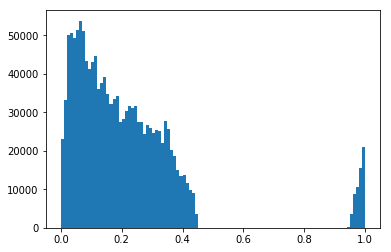

In [7]:
train['mjd_frac'] = np.modf(train.mjd)[0]

_ = plt.hist(train.mjd_frac, bins=100)

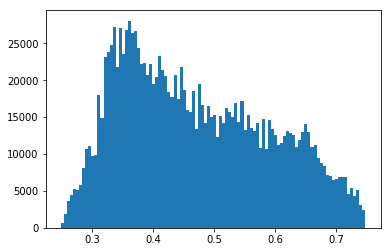

In [8]:
train['mjd_frac'] = np.modf(train.mjd + 0.3)[0]

_ = plt.hist(train.mjd_frac, bins=100)

In [9]:
train['mjd_night'] = np.modf(train.mjd + 0.3)[1]

In [102]:
def middle_gap(s):
    s = s.values
    s_prev = np.roll(s, 1)
    s_delta = s - s_prev
    s_delta_max = np.argmax(s_delta)
    s_middle_gap = (s[s_delta_max] + s_prev[s_delta_max]) / 2
    s_middle_gap = np.modf(s_middle_gap / 365)[0] * 365
    return s_middle_gap
    
train['middle_gap'] = train.groupby('object_id').mjd_night.transform(middle_gap)

In [103]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected,ddf,ra,decl,target,mjd_frac,mjd_night,middle_gap
0,615,59750.4229,2,-544.810303,3.622952,1,1,349.046051,-61.943836,92,0.7229,59750.0,142.5
1,615,59750.4306,1,-816.434326,5.553370,1,1,349.046051,-61.943836,92,0.7306,59750.0,142.5
2,615,59750.4383,3,-471.385529,3.801213,1,1,349.046051,-61.943836,92,0.7383,59750.0,142.5
3,615,59750.4450,4,-388.984985,11.395031,1,1,349.046051,-61.943836,92,0.7450,59750.0,142.5
4,615,59752.4070,2,-681.858887,4.041204,1,1,349.046051,-61.943836,92,0.7070,59752.0,142.5


In [104]:
print(list(set(train['object_id']))[:5])

[262146, 131075, 21004292, 327691, 92602382]


In [105]:
temp_list = [262146, 131075, 21004292, 327691, 92602382]

In [106]:
k = train[train['object_id'].isin(temp_list)]

In [107]:
k = k.reset_index(drop=True)

In [108]:
k.shape

(1213, 13)

In [109]:
del k['middle_gap']

In [110]:
k.head()

,object_id,mjd,passband,flux,flux_err,detected,ddf,ra,decl,target,mjd_frac,mjd_night
0,131075,59825.2600,2,1.063952,0.936446,0,1,52.910156,-25.944481,42,0.5600,59825.0
1,131075,59825.2676,1,-1.672515,1.016746,0,1,52.910156,-25.944481,42,0.5676,59825.0
2,131075,59825.2752,3,1.353600,1.878457,0,1,52.910156,-25.944481,42,0.5752,59825.0
3,131075,59825.2862,4,-3.212027,2.988274,0,1,52.910156,-25.944481,42,0.5862,59825.0
4,131075,59825.2971,5,-19.011518,7.129535,0,1,52.910156,-25.944481,42,0.5971,59825.0


In [111]:
k.tail()

,object_id,mjd,passband,flux,flux_err,detected,ddf,ra,decl,target,mjd_frac,mjd_night
1208,92602382,60560.9877,4,-6.769679,18.296959,0,0,293.378906,-1.790785,16,0.2877,60561.0
1209,92602382,60571.0382,5,16.388741,22.963448,0,0,293.378906,-1.790785,16,0.3382,60571.0
1210,92602382,60584.0396,0,-27.146301,35.722149,0,0,293.378906,-1.790785,16,0.3396,60584.0
1211,92602382,60585.9916,4,-9.019654,24.284599,0,0,293.378906,-1.790785,16,0.2916,60586.0
1212,92602382,60610.0292,1,17.744576,24.315296,0,0,293.378906,-1.790785,16,0.3292,60610.0


In [112]:
k[220:225]

,object_id,mjd,passband,flux,flux_err,detected,ddf,ra,decl,target,mjd_frac,mjd_night
220,131075,60300.0793,3,0.065185,1.672486,0,1,52.910156,-25.944481,42,0.3793,60300.0
221,131075,60300.1031,4,0.833520,2.228576,0,1,52.910156,-25.944481,42,0.4031,60300.0
222,131075,60300.1160,5,0.642527,4.886427,0,1,52.910156,-25.944481,42,0.4160,60300.0
223,131075,60554.2916,0,3.710820,2.027519,0,1,52.910156,-25.944481,42,0.5916,60554.0
224,131075,60555.2620,0,0.300899,1.871609,0,1,52.910156,-25.944481,42,0.5620,60555.0


In [113]:
60532.3019 - 60294.0708	

238.23109999999724

In [114]:
pd.Series(k.iloc[221,:])

object_id    131075.000000
mjd           60300.103100
passband          4.000000
flux              0.833520
flux_err          2.228576
detected          0.000000
ddf               1.000000
ra               52.910156
decl            -25.944481
target           42.000000
mjd_frac          0.403100
mjd_night     60300.000000
Name: 221, dtype: float64

In [51]:
pd.Series(k.iloc[222,:])

object_id     262146.000000
mjd            60532.301900
passband           2.000000
flux               1.720628
flux_err           1.024858
detected           0.000000
ddf                1.000000
ra                34.453125
decl              -5.229529
target            42.000000
mjd_frac           0.601900
mjd_night      60532.000000
middle_gap       188.000000
Name: 222, dtype: float64

In [52]:
pd.Series(k.iloc[223,:])

object_id     262146.000000
mjd            60532.309700
passband           1.000000
flux               1.582602
flux_err           0.954517
detected           0.000000
ddf                1.000000
ra                34.453125
decl              -5.229529
target            42.000000
mjd_frac           0.609700
mjd_night      60532.000000
middle_gap       188.000000
Name: 223, dtype: float64

In [65]:
a = np.array(k['mjd'])

In [66]:
a_prev = np.roll(k['mjd'],shift=1)

In [67]:
a_index = np.argmax(np.array(a - a_prev))

In [69]:
a_middle_gap = (a[a_index] + a[a_index]) / 2

In [70]:
print(a_middle_gap)

60532.3019


In [47]:
np.argmax(np.array(k['mjd'] - np.roll(k['mjd'],shift=1)))

222

In [71]:
s_middle_gap = np.modf(a_middle_gap / 365)[0] * 365

In [72]:
s_middle_gap

307.30189999999584